# __Project: Investigate tmdb movies dataset__

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> TMDB movies dataset includes information about around 11000 movies. In this data set we have 21 columns each of which gives a different information about a particular movie like release date, genres, revenue, budget etc.

> I have performed exploratory analysis on the given data set and I have tried my best to answer the following questions regarding the data set.

> What is average profit by genre for movies which only have a single genre?

> Trends of top ten genres present in most movies over the decades?

> Trends of bottom ten genres present in most movies over the decades?

> What is the total number of movies pertaining to each genre?

> Which genre(s) is/are most popular over decades?

> What are the properties associated with movies having high adjusted profits?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, we will load in the data, check for cleanliness, and then trim and clean our dataset for analysis. I have documented brief explanations of the steps I have taken below. 


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

__Loading the data set and checking the number of rows and columns in the data set.__

In [80]:
df = pd.read_csv('tmdb-movies.csv')
df.head()
print(df.shape)


(10866, 21)


__Checking for information about columns of the dataset__

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

__Converting release_date column to datetime.__

In [82]:
df.release_date = pd.to_datetime(df.release_date)


__Checking for duplicate rows in the data set.__

In [83]:
df.loc[df.duplicated(keep = False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0





### Data Cleaning 

__Dropping duplicate rows from the data set.__

In [84]:
df.drop_duplicates(inplace = True)
df.shape

(10865, 21)

__Dropping rows which have genres as null.__

In [85]:
df.dropna(subset = ['genres'],how = 'any',inplace = True)


__Treating null values in the following columns by imputing mean values to them__.

In [86]:
df.budget.replace(to_replace = 0,value = df.budget.mean(),inplace = True)
df.revenue.replace(to_replace = 0, value = df.revenue.mean(),inplace = True)
df.budget_adj.replace(to_replace = 0,value = df.budget_adj.mean(),inplace = True)
df.revenue_adj.replace(to_replace = 0,value = df.revenue_adj.mean(),inplace = True)


In [87]:
df.runtime.replace(to_replace = 0,value = df.runtime.mean(),inplace = True)

__In the above two cells I have replaced all the values which identified as zero by the mean of all the values of that particular column.__

In [88]:
df.shape

(10842, 21)

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What is average profit by genre for movies which only have a single genre?)

__Creating two new columns profit and decade.__

In [89]:
df['profit'] = df['revenue'] - df['budget']



In [90]:
df['decade'] = pd.cut(df.release_year,[1959,1969,1979,1989,1999,2009,2019],labels = ['60\'s','70\'s','80\'s','90\'s','00\'s','current decade'])



__The profit cell has been created to address some of the questions posed in the introduction.__
__The decade cell has been created to make the visual analysis of some of the questions posed much easier and crisp and clear so that visuals are easy on the eye.__

__Creating a new data frame which has movies which contain only a single genre. This is done to address the above question number one__

In [91]:
df_single_genre = df[df.genres.str.contains('\|') == False]
df_single_genre.genres.unique()

array(['Action', 'Comedy', 'Drama', 'Thriller', 'Horror', 'Documentary',
       'TV Movie', 'Animation', 'Crime', 'Adventure', 'Family', 'Romance',
       'Science Fiction', 'Music', 'Western', 'Fantasy', 'War', 'Foreign',
       'History', 'Mystery'], dtype=object)

__Defining average profit variables and plotting a bar graph for average profit by genre.__

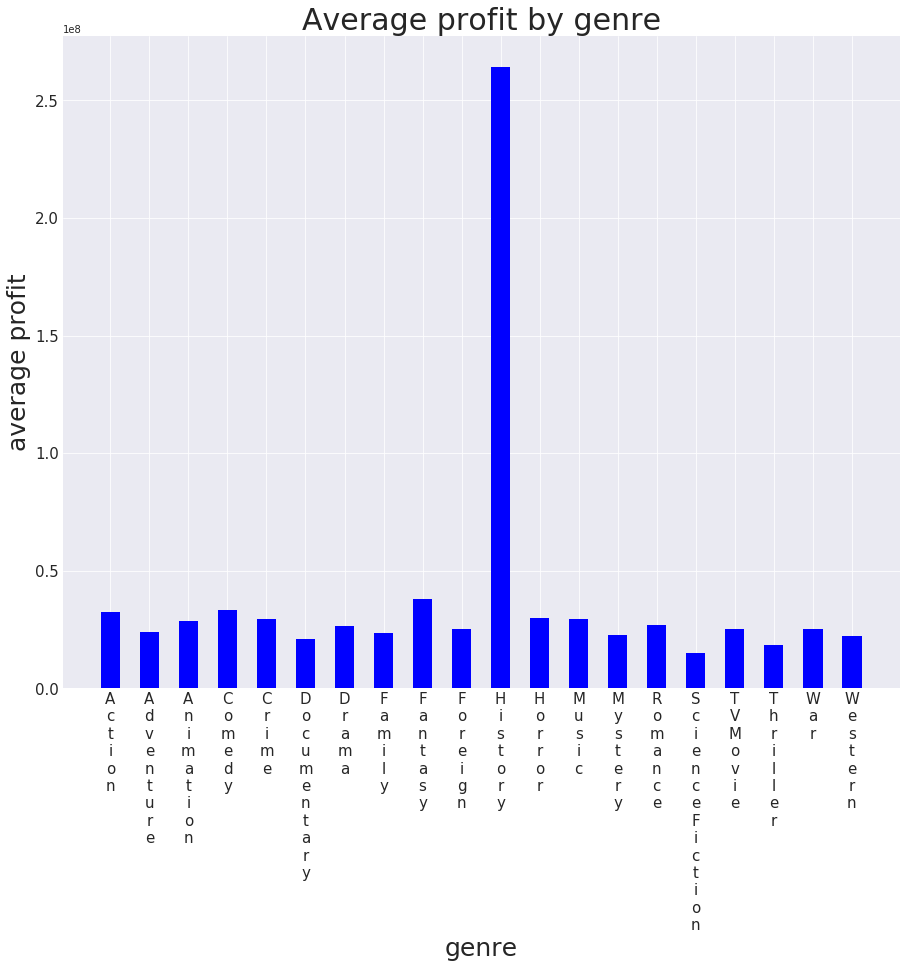

In [92]:
profit_by_genre = df_single_genre.groupby('genres')['profit'].mean()
profit_by_genre = profit_by_genre.astype(int)

figsize = plt.rcParams['figure.figsize']
figsize[0] = 15
figsize[1] = 12
plt.bar(np.arange(len(profit_by_genre.index)),profit_by_genre,width = 0.5,color = 'b')
plt.xlabel('genre',fontsize = 25)
plt.ylabel('average profit',fontsize = 25)
plt.title('Average profit by genre',fontsize = 30);
plt.xticks(np.arange(len(profit_by_genre.index)),profit_by_genre.index.str.wrap(0.2),fontsize = 15);
plt.yticks(fontsize = 15);

__From the above bar chart we can see that in movies having single genre the highest average profit is made by movies of genre History and the average profit amount for History genre is 264317794 units, values for all the genres are given in the cell below.__ 

In [93]:
profit_by_genre

genres
Action              32460186
Adventure           23937931
Animation           28514984
Comedy              33428401
Crime               29307844
Documentary         20936152
Drama               26316897
Family              23511613
Fantasy             37797478
Foreign             25256074
History            264317794
Horror              29690042
Music               29540883
Mystery             22470846
Romance             27033200
Science Fiction     15119096
TV Movie            25256074
Thriller            18174353
War                 25243633
Western             22033752
Name: profit, dtype: int64

__As the above graph concludes that for movies made of single genre, history is the highest profit earning genre.__

### Q2. Trends of top ten genres present in most movies over the decades 

__To address the above question we will first need to explore which genres are top ten in terms of number of movies they are present in over the entire data set.__

__Creating series attributed to a particular genre and grouped by decade.__
__We define a function which returns the number of movies a particular genre is present in.__

In [94]:
def number_of_movies_of_a_genre(genre):
    genre_n = df.genres.str.contains(genre,case = False).sum()
    return genre_n


__In the cell below I have written the code to get the top ten genres in terms of number f movies they are present in.__

In [95]:
list_of_genres = df_single_genre.genres.unique()
list_containing_number_of_movies_of_each_genre = []
for i in list_of_genres :
    number_of_movies_of_a_genre(i)
    list_containing_number_of_movies_of_each_genre.append(number_of_movies_of_a_genre(i))
list_containing_number_of_movies_of_each_genre = pd.Series(list_containing_number_of_movies_of_each_genre, index = list_of_genres )
list_containing_number_of_movies_of_each_genre.sort_values(ascending =  False,inplace = True)
list_containing_number_of_movies_of_each_genre.iloc[0:10].index
    

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Horror',
       'Adventure', 'Crime', 'Family', 'Science Fiction'],
      dtype='object')

__In the cell below I have defined a function which returns a series containing number of movies of a particular genre by decade.__

In [96]:
def gbd_genre(genre):
    gbd_genre = (df[df.genres.str.contains(genre,case = False)]).groupby('decade')['genres'].count()
    return gbd_genre
    

__Plotting line graph to show the number of movies attributed to top ten genres(in terms of number of movies all time) decade by decade.__
> NOTE: gbd here stands for genre by decade.

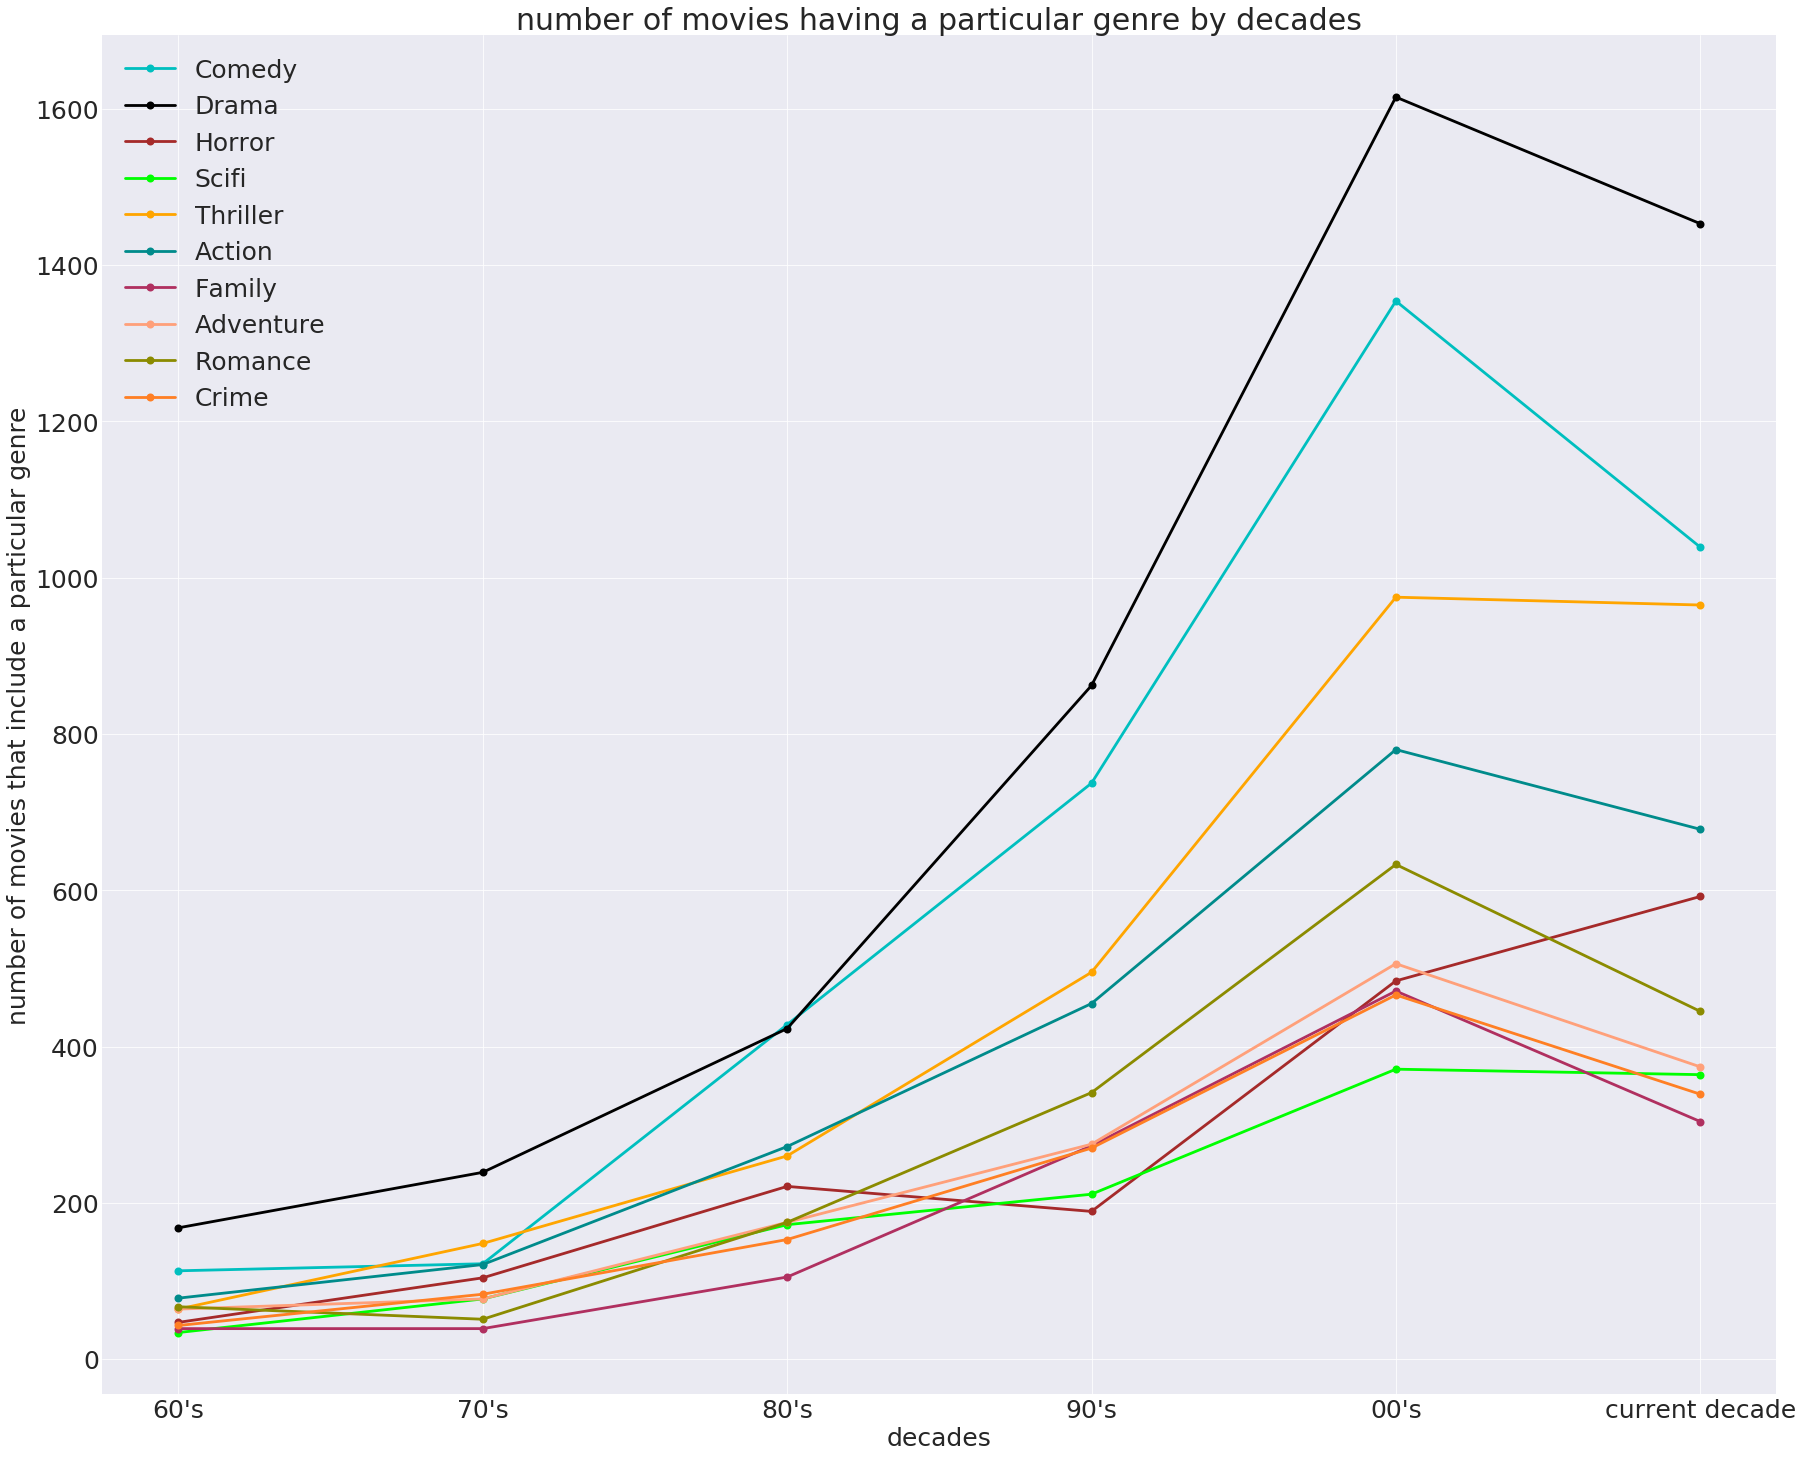

In [97]:
figsize[0] = 30
figsize[1] = 25
ind = np.arange(6)
plt.plot(ind,gbd_genre('Comedy'),linewidth = 2.8, color = 'c',marker = 'o', markeredgewidth = 2,label = 'Comedy')
plt.plot(ind,gbd_genre('Drama'),linewidth = 2.8,color = 'k',marker = 'o',markeredgewidth = 2,label = 'Drama')
plt.plot(ind,gbd_genre('Horror'),linewidth = 2.8,color = 'brown',marker = 'o',markeredgewidth = 2,label = 'Horror')
plt.plot(ind,gbd_genre('Science Fiction'),linewidth = 2.8,color = 'lime',marker = 'o',markeredgewidth = 2,label = 'Scifi')
plt.plot(ind,gbd_genre('Thriller'),linewidth = 2.8,color = 'orange',marker = 'o',markeredgewidth = 2,label = 'Thriller')
plt.plot(ind,gbd_genre('Action'),linewidth = 2.8,color = '#008b8b',marker = 'o',markeredgewidth = 2,label = 'Action')
plt.plot(ind,gbd_genre('Family'),linewidth = 2.8,color = '#b03060',marker = 'o',markeredgewidth = 2,label = 'Family')
plt.plot(ind,gbd_genre('Adventure'),linewidth = 2.8,color = '#ffa07a',marker = 'o',markeredgewidth = 2,label = 'Adventure')
plt.plot(ind,gbd_genre('Romance'),linewidth = 2.8,color = '#8b8b00',marker = 'o',markeredgewidth = 2,label = 'Romance')
plt.plot(ind,gbd_genre('Crime'),linewidth = 2.8,color = '#ff7f24',marker = 'o',markeredgewidth = 2,label = 'Crime')
plt.xlabel('decades',fontsize=25)
plt.ylabel('number of movies that include a particular genre',fontsize=25)
plt.title('number of movies having a particular genre by decades',fontsize=30)
plt.xticks(ind,gbd_genre('Animation').index.categories,fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc = 'upper left',fontsize = 25);

__Looking at the above line chart we can see that among the top ten genres, Drama has the lead in all the decades except in 80's where it was slightly trumped by Comedy, detailed number for each genre among top ten are given below.__

In [98]:
print('Comedy')
print(gbd_genre('Comedy'))

print('Drama')
print(gbd_genre('Drama'))

print('Horror')
print(gbd_genre('Horror'))

print('Science Fiction')
print(gbd_genre('Science Fiction'))

print('Thriller')
print(gbd_genre('Thriller'))

print('Action')
print(gbd_genre('Action'))

print('Family')
print(gbd_genre('Family'))

print('Adventure')
print(gbd_genre('Adventure'))

print('Romance')
print(gbd_genre('Romance'))

print('Crime')
print(gbd_genre('Crime'))

Comedy
decade
60's               113
70's               122
80's               428
90's               737
00's              1354
current decade    1039
Name: genres, dtype: int64
Drama
decade
60's               168
70's               239
80's               423
90's               862
00's              1615
current decade    1453
Name: genres, dtype: int64
Horror
decade
60's               47
70's              104
80's              221
90's              189
00's              484
current decade    592
Name: genres, dtype: int64
Science Fiction
decade
60's               34
70's               77
80's              172
90's              211
00's              371
current decade    364
Name: genres, dtype: int64
Thriller
decade
60's               64
70's              148
80's              260
90's              495
00's              975
current decade    965
Name: genres, dtype: int64
Action
decade
60's               78
70's              121
80's              272
90's              455
00's       

### Q3. Trends of bottom ten genres present in most movies over the decades. 

__Since we have already figured out the top ten the remaining genres are ofcourse the bottom ten(as total is 20), having defined the function gbd_genre earlier in the column below we put it to use again to address our question.__
> NOTE: gbd here stands for genre by decade.

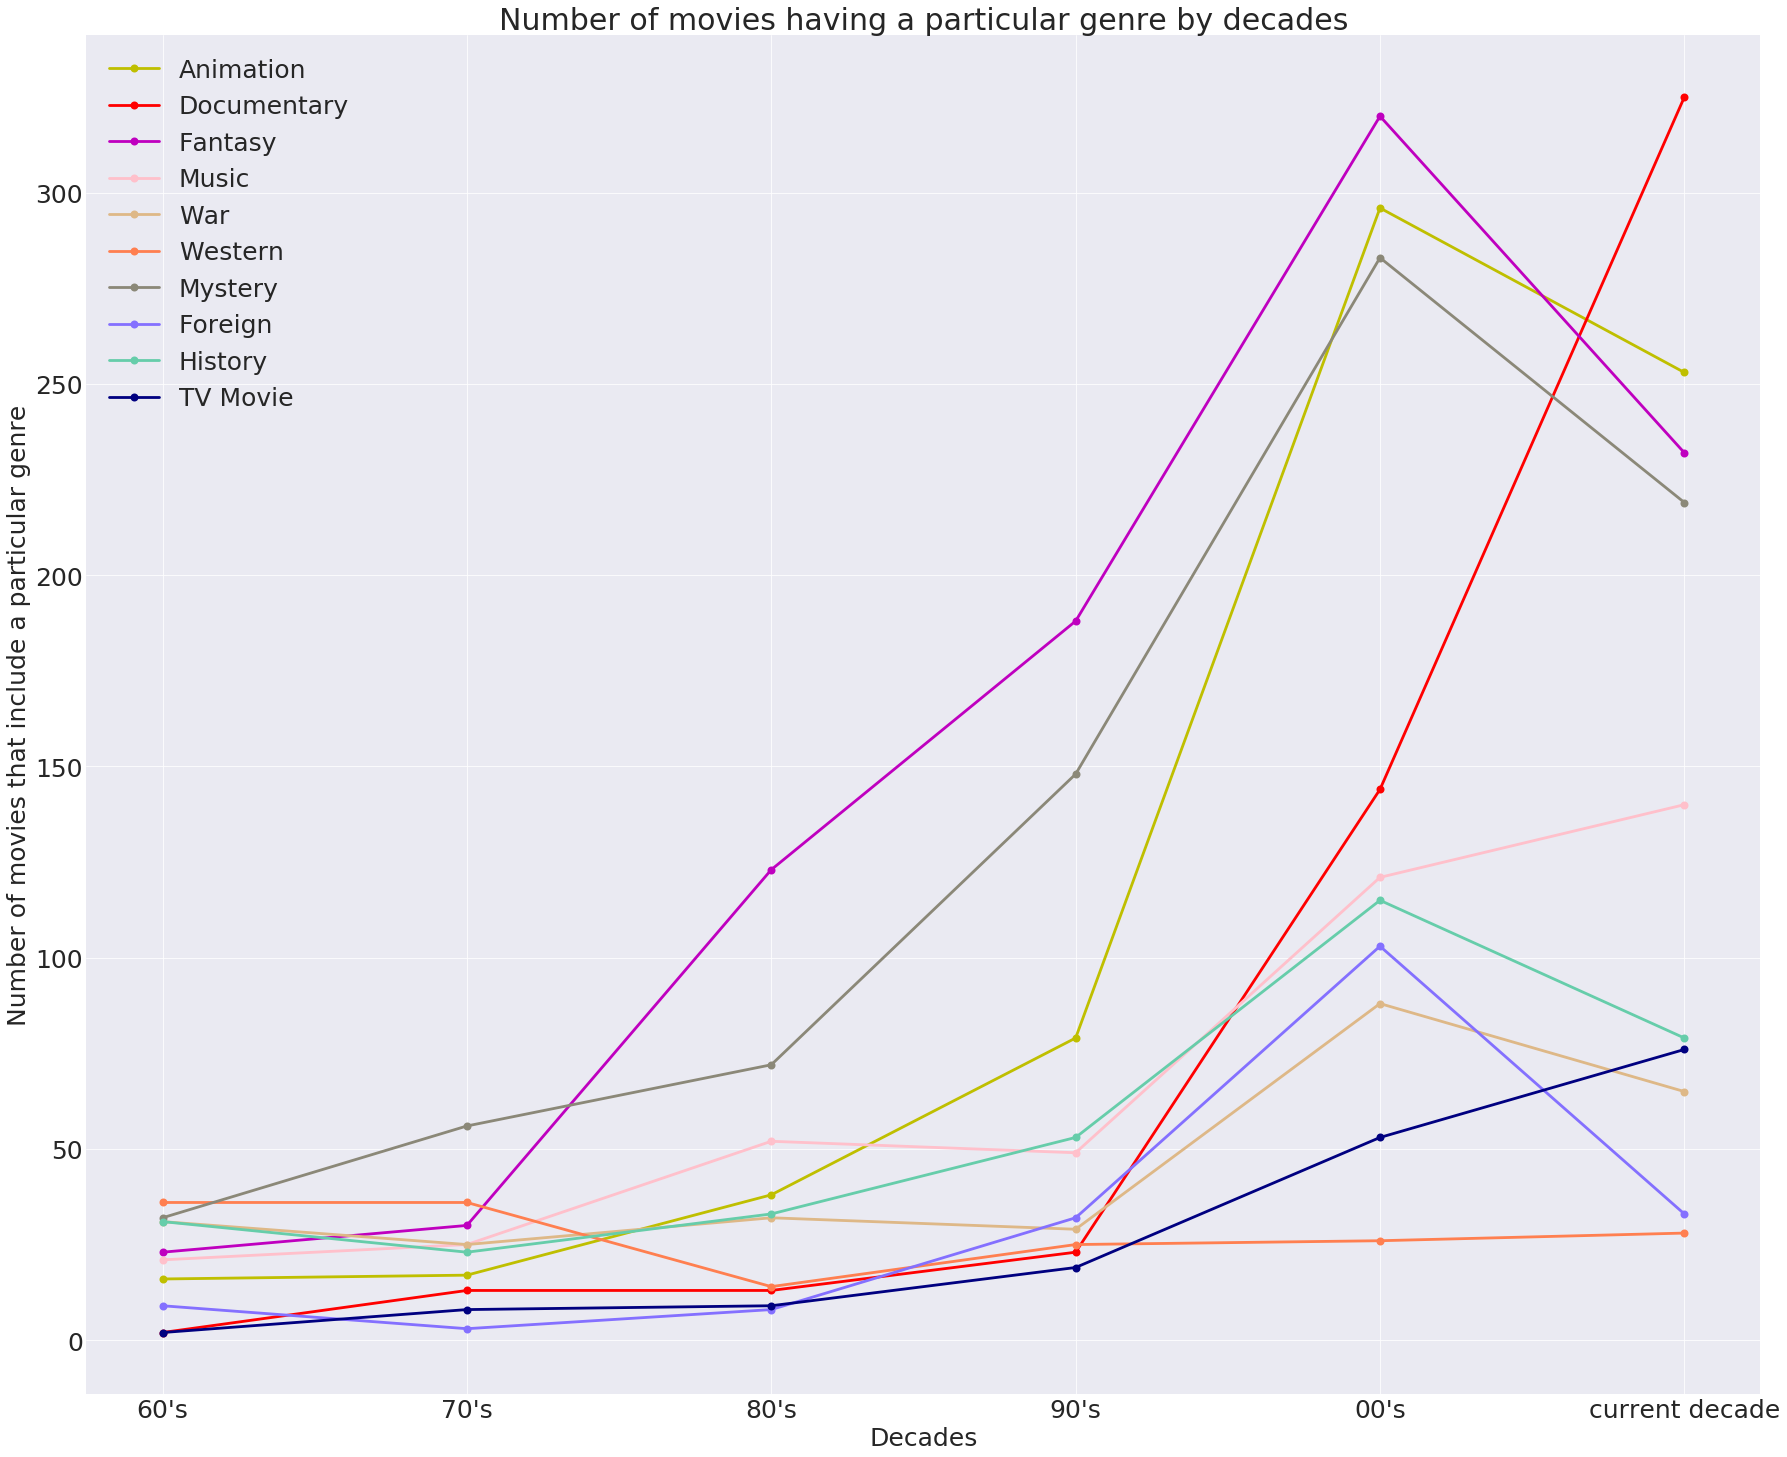

In [118]:

figsize[0] = 30
figsize[1] = 25
ind = np.arange(6)
plt.plot(ind,gbd_genre('Animation'),linewidth = 2.8,color = 'y',marker = 'o',markeredgewidth = 2,label = 'Animation')
plt.plot(ind,gbd_genre('Documentary'),linewidth = 2.8,color = 'r',marker = 'o',markeredgewidth = 2,label = 'Documentary')
plt.plot(ind,gbd_genre('Fantasy'),linewidth = 2.8,color = 'm',marker = 'o',markeredgewidth = 2,label = 'Fantasy')
plt.plot(ind,gbd_genre('Music'),linewidth = 2.8,color = 'pink',marker = 'o',markeredgewidth = 2,label = 'Music')
plt.plot(ind,gbd_genre('War'),linewidth = 2.8,color = 'burlywood',marker = 'o',markeredgewidth = 2,label = 'War')
plt.plot(ind,gbd_genre('Western'),linewidth = 2.8,color = 'coral',marker = 'o',markeredgewidth = 2,label = 'Western')
plt.plot(ind,gbd_genre('Mystery'),linewidth = 2.8,color = '#8b8878',marker = 'o',markeredgewidth = 2,label = 'Mystery')
plt.plot(ind,gbd_genre('Foreign'),linewidth = 2.8,color = '#8470ff',marker = 'o',markeredgewidth = 2,label = 'Foreign')
plt.plot(ind,gbd_genre('History'),linewidth = 2.8,color = '#66cdaa',marker = 'o',markeredgewidth = 2,label = 'History')
plt.plot(ind,gbd_genre('TV Movie'),linewidth = 2.8,color = '#000080',marker = 'o',markeredgewidth = 2,label = 'TV Movie')
plt.xlabel('Decades',fontsize=25)
plt.ylabel('Number of movies that include a particular genre',fontsize=25)
plt.title('Number of movies having a particular genre by decades',fontsize=30)
plt.xticks(ind,gbd_genre('Animation').index.categories,fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc = 'upper left',fontsize = 25);

__From the line chart above we can see that in 60's genre Western has the edge in terms of number of movies it it's is present in, 70's the lead is taken by genre Mystery, from then on till 00's genre Fantasy leads among the bottom ten and in the current decade so far genre Documentary surges and leaps ahead of all the other amongst the bottom ten.__
__In the below cell you can see the detailed breakup of numbers for each genre in bottom ten over the decade.__

In [119]:
print('Animation')
print(gbd_genre('Animation'))

print('Documentary')
print(gbd_genre('Documentary'))

print('Fantasy')
print(gbd_genre('Fantasy'))

print('Music')
print(gbd_genre('Music'))

print('War')
print(gbd_genre('War'))

print('Western')
print(gbd_genre('Western'))

print('Mystery')
print(gbd_genre('Mystery'))

print('Foreign')
print(gbd_genre('Foreign'))

print('History')
print(gbd_genre('History'))

print('TV Movie')
print(gbd_genre('TV Movie'))

Animation
decade
60's               16
70's               17
80's               38
90's               79
00's              296
current decade    253
Name: genres, dtype: int64
Documentary
decade
60's                2
70's               13
80's               13
90's               23
00's              144
current decade    325
Name: genres, dtype: int64
Fantasy
decade
60's               23
70's               30
80's              123
90's              188
00's              320
current decade    232
Name: genres, dtype: int64
Music
decade
60's               21
70's               25
80's               52
90's               49
00's              121
current decade    140
Name: genres, dtype: int64
War
decade
60's              31
70's              25
80's              32
90's              29
00's              88
current decade    65
Name: genres, dtype: int64
Western
decade
60's              36
70's              36
80's              14
90's              25
00's              26
current decade  

### Q4. What is the total number of movies pertaining to each genre?

__Calculating the number of times a genre has been present in the movies of the dataset.__

__Since we have earlier already defined a function which returns the number of movies pertaining to particular genre we will use that fuction in the cells below to create a list containing numbers for all genres.__

In [101]:
number_of_times_a_genre_is_present_in_movies = [number_of_movies_of_a_genre('Action'),number_of_movies_of_a_genre('Comedy'),number_of_movies_of_a_genre('Adventure'),number_of_movies_of_a_genre('Science Fiction'),number_of_movies_of_a_genre('Thriller'),number_of_movies_of_a_genre('Fantasy'),number_of_movies_of_a_genre('Crime'),number_of_movies_of_a_genre('Drama'),number_of_movies_of_a_genre('Western'),number_of_movies_of_a_genre('Documentary'),number_of_movies_of_a_genre('Horror'),number_of_movies_of_a_genre('Romance'),number_of_movies_of_a_genre('Animation'),number_of_movies_of_a_genre('Music'),number_of_movies_of_a_genre('Family'),number_of_movies_of_a_genre('Mystery'),number_of_movies_of_a_genre('TV Movie'),number_of_movies_of_a_genre('War'),number_of_movies_of_a_genre('Foreign'),number_of_movies_of_a_genre('History')]

__In the cell below I have created a series containing all the genres to be used for plotting of bar chart in the upcoming cells.__

In [102]:
list_of_genres = pd.Series(['Action','Comedy','Adventure','Science Fiction','Thriller','Fantasy','Crime','Drama','Western','Documentary','Horror','Romance','Animation','Music','Family','Mystery','TV Movie','War','Foreign','History'])


__Plotting a bar chart which depicts the number of movies a particuar genre has been part of.__

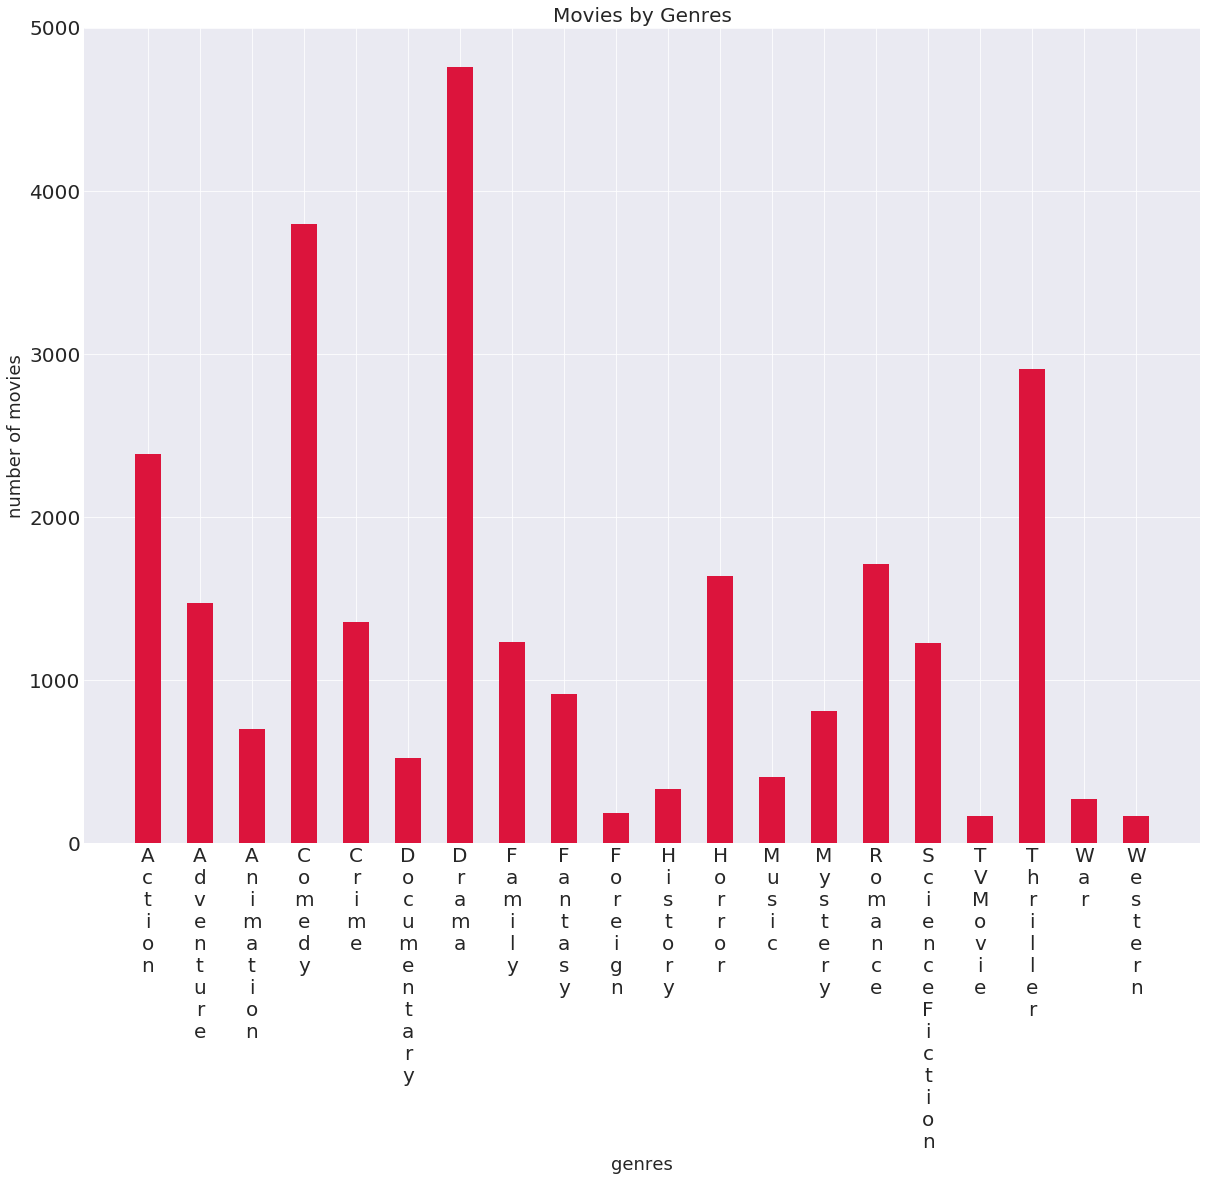

In [103]:
figsize[0] = 20
figsize[1] = 15
plt.bar(list_of_genres.str.wrap(0.2),number_of_times_a_genre_is_present_in_movies,width = 0.5,color = 'crimson')
plt.xlabel('genres',fontsize = 18)
plt.ylabel('number of movies',fontsize = 18)
plt.title('Movies by Genres',fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20);

__Looking at at the bar chart above we can see clearly that Drama genre has been in the maximum number of movies in the give data set, detailed numbers for every genre are provided in the cell below.__

Action - 2384,
Comedy - 3793,
Adventure - 1471,
Science Fiction - 1229,
Thriller - 2907,
Fantasy - 916,
Crime - 1354,
Drama - 4760,
Western - 165,
Documentary - 520,
Horror - 1637,
Romance - 1712,
Animation - 699,
Music - 408,
Family - 1231,
Mystery - 810,
TV Movie - 167,
War - 270,
Foreign - 188,
History - 334

### Q5. Which genre garners the most popularity over the decades?

__To plot the appropriate charts for visual answers to this question we'll again divide the genres as we did previously in two gropus top ten and bottom ten based on the number of movies a particular genre is present in.__

__Below I have defined various series which contain the average popularity scores for each genre over the decades.__

_pbd means popularity by decade_

__I have defined a fuction in the cell below which returns a series of average poularity scores for a genre, each score represent the average popularity score for that genre for that decade.__

In [104]:
def popularity_by_decade(genre):
    pbd_genre = (df[df.genres.str.contains(genre, case = False)]).groupby('decade')['popularity'].mean()
    return pbd_genre

__Below I have plotted a line graph which shows popularity of top ten genres (based on the number of movies of that particular genre) over the decades.__

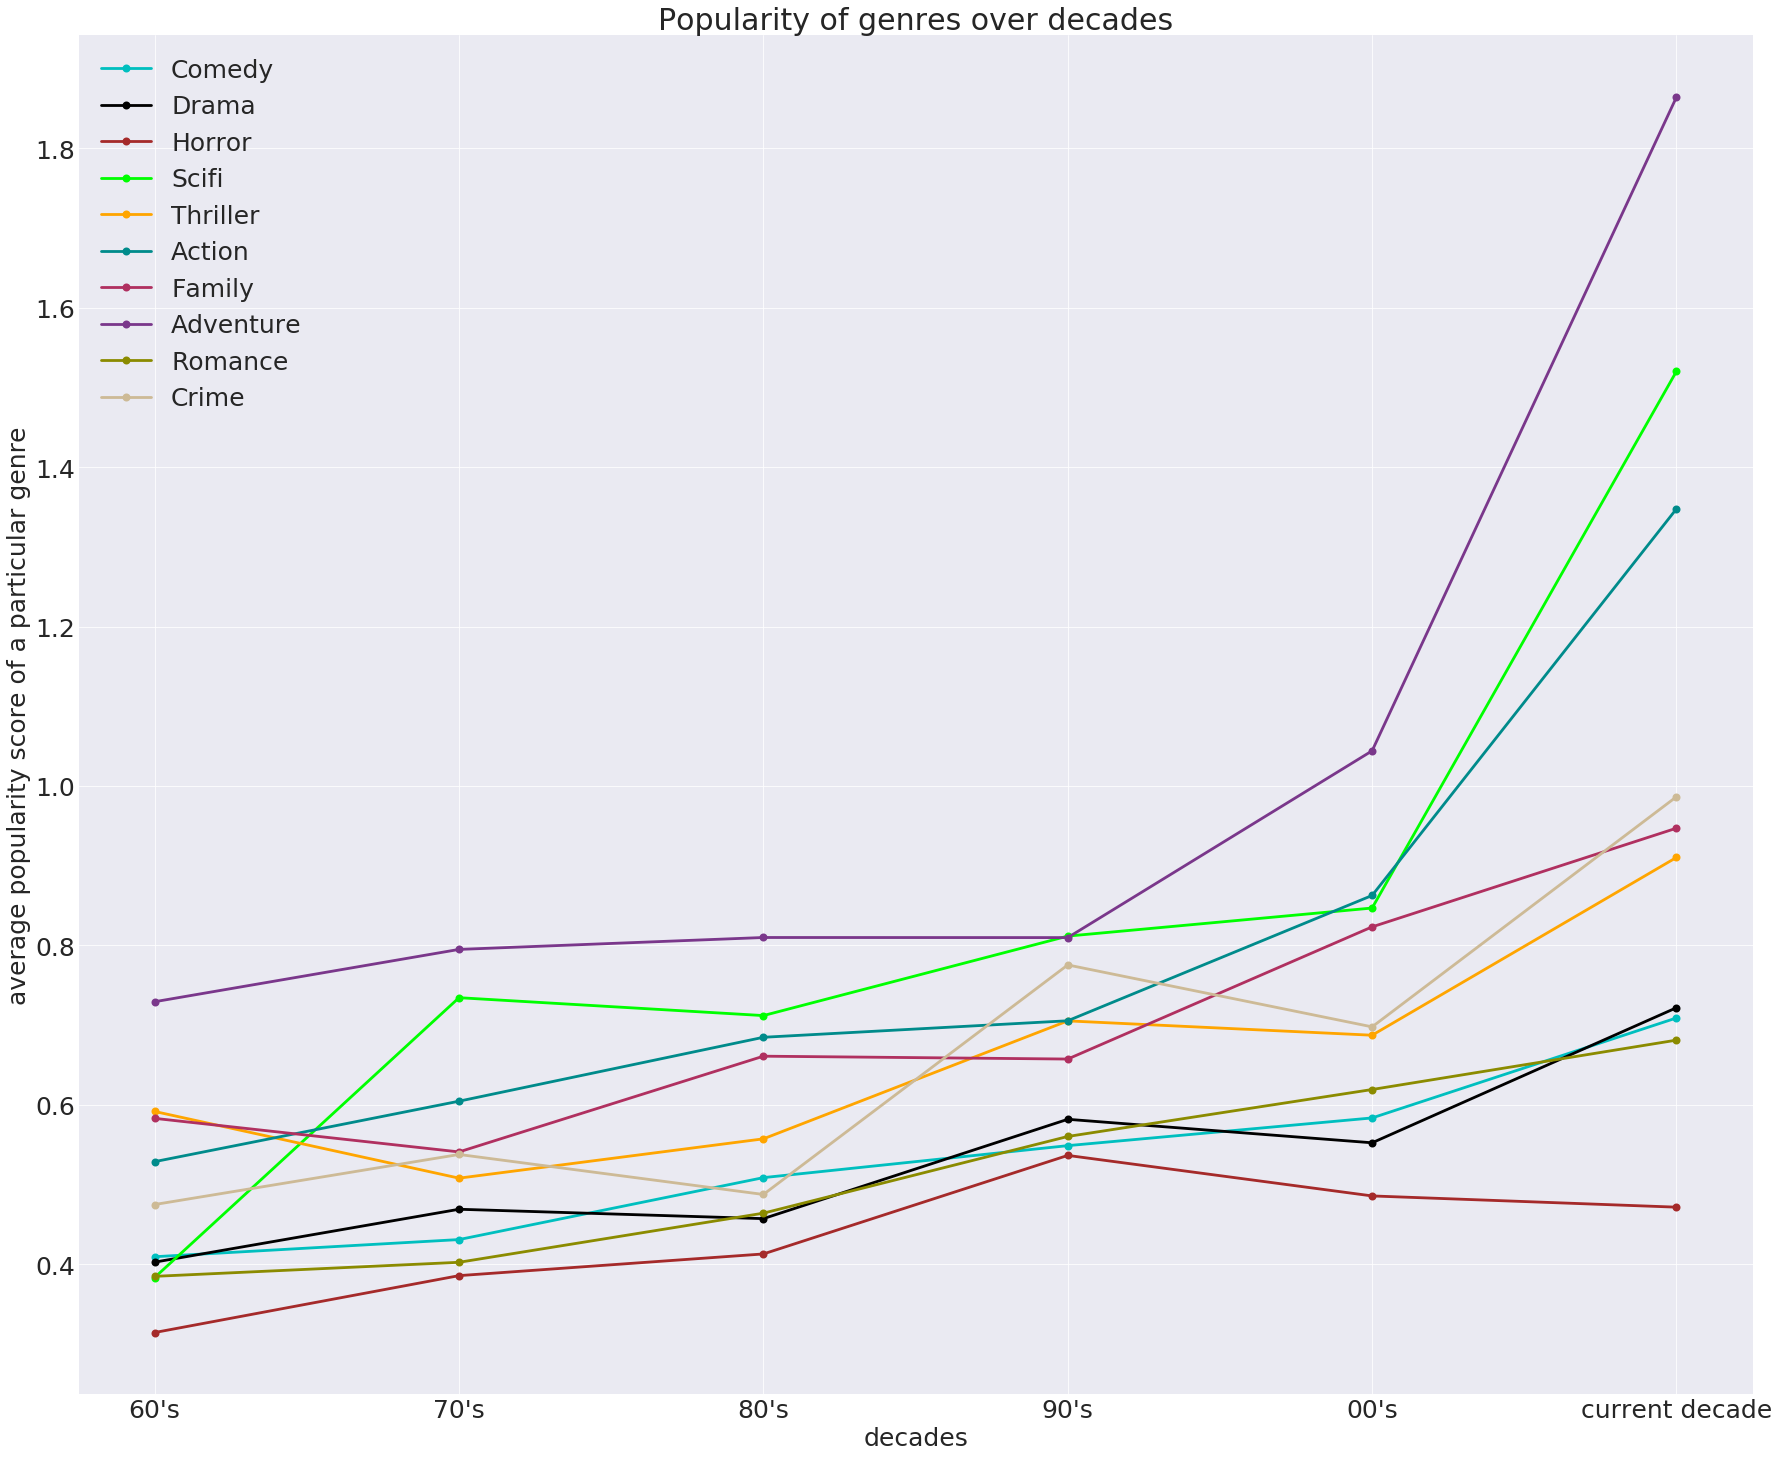

In [105]:
figsize[0] = 30
figsize[1] = 25
ind = np.arange(6)
plt.plot(ind,popularity_by_decade('Comedy'),linewidth = 2.8, color = 'c',marker = 'o', markeredgewidth = 2,label = 'Comedy')
plt.plot(ind,popularity_by_decade('Drama'),linewidth = 2.8,color = 'k',marker = 'o',markeredgewidth = 2,label = 'Drama')
plt.plot(ind,popularity_by_decade('Horror'),linewidth = 2.8,color = 'brown',marker = 'o',markeredgewidth = 2,label = 'Horror')
plt.plot(ind,popularity_by_decade('Science Fiction'),linewidth = 2.8,color = 'lime',marker = 'o',markeredgewidth = 2,label = 'Scifi')
plt.plot(ind,popularity_by_decade('Thriller'),linewidth = 2.8,color = 'orange',marker = 'o',markeredgewidth = 2,label = 'Thriller')
plt.plot(ind,popularity_by_decade('Action'),linewidth = 2.8,color = '#008b8b',marker = 'o',markeredgewidth = 2,label = 'Action')
plt.plot(ind,popularity_by_decade('Family'),linewidth = 2.8,color = '#b03060',marker = 'o',markeredgewidth = 2,label = 'Family')
plt.plot(ind,popularity_by_decade('Adventure'),linewidth = 2.8,color = '#7a378b',marker = 'o',markeredgewidth = 2,label = 'Adventure')
plt.plot(ind,popularity_by_decade('Romance'),linewidth = 2.8,color = '#8b8b00',marker = 'o',markeredgewidth = 2,label = 'Romance')
plt.plot(ind,popularity_by_decade('Crime'),linewidth = 2.8,color = '#cdba96',marker = 'o',markeredgewidth = 2,label = 'Crime')
plt.xlabel('decades',fontsize=25)
plt.ylabel('average popularity score of a particular genre',fontsize=25)
plt.title('Popularity of genres over decades',fontsize=30)
plt.xticks(ind,popularity_by_decade('Animation').index.categories,fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc = 'upper left',fontsize = 25);


__Looking at the above line chart we can clearly see that in every decade genre Adventure has the highest popularity over the decades among the top ten barring in 90's where Science Fiction trumps it by a slight margin. Below cell contains the detailed numbers(average popularity scores for top ten genre by decades) depicting popularity of each genre in the above category.__

In [106]:
print('Comedy')
print(popularity_by_decade('Comedy'))
print('Drama')
print(popularity_by_decade('Drama'))
print('Horror')
print(popularity_by_decade('Horror'))
print('Science Fiction')
print(popularity_by_decade('Science Fiction'))
print('Thriller')
print(popularity_by_decade('Thriller'))
print('Action')
print(popularity_by_decade('Action'))
print('Family')
print(popularity_by_decade('Family'))
print('Adventure')
print(popularity_by_decade('Adventure'))
print('Romance')
print(popularity_by_decade('Romance'))
print('Crime')
print(popularity_by_decade('Crime'))

Comedy
decade
60's              0.409414
70's              0.430941
80's              0.508643
90's              0.548778
00's              0.583556
current decade    0.708987
Name: popularity, dtype: float64
Drama
decade
60's              0.402609
70's              0.468969
80's              0.457209
90's              0.581831
00's              0.552361
current decade    0.721813
Name: popularity, dtype: float64
Horror
decade
60's              0.314311
70's              0.385690
80's              0.412893
90's              0.536522
00's              0.485685
current decade    0.471589
Name: popularity, dtype: float64
Science Fiction
decade
60's              0.383337
70's              0.734403
80's              0.711960
90's              0.811676
00's              0.846898
current decade    1.520329
Name: popularity, dtype: float64
Thriller
decade
60's              0.591658
70's              0.507987
80's              0.557316
90's              0.705312
00's              0.687322
curre

__Below I have plotted a line graph which shows popularity of bottom ten genres (based on the number of movies of that particular genre) over the decades.__

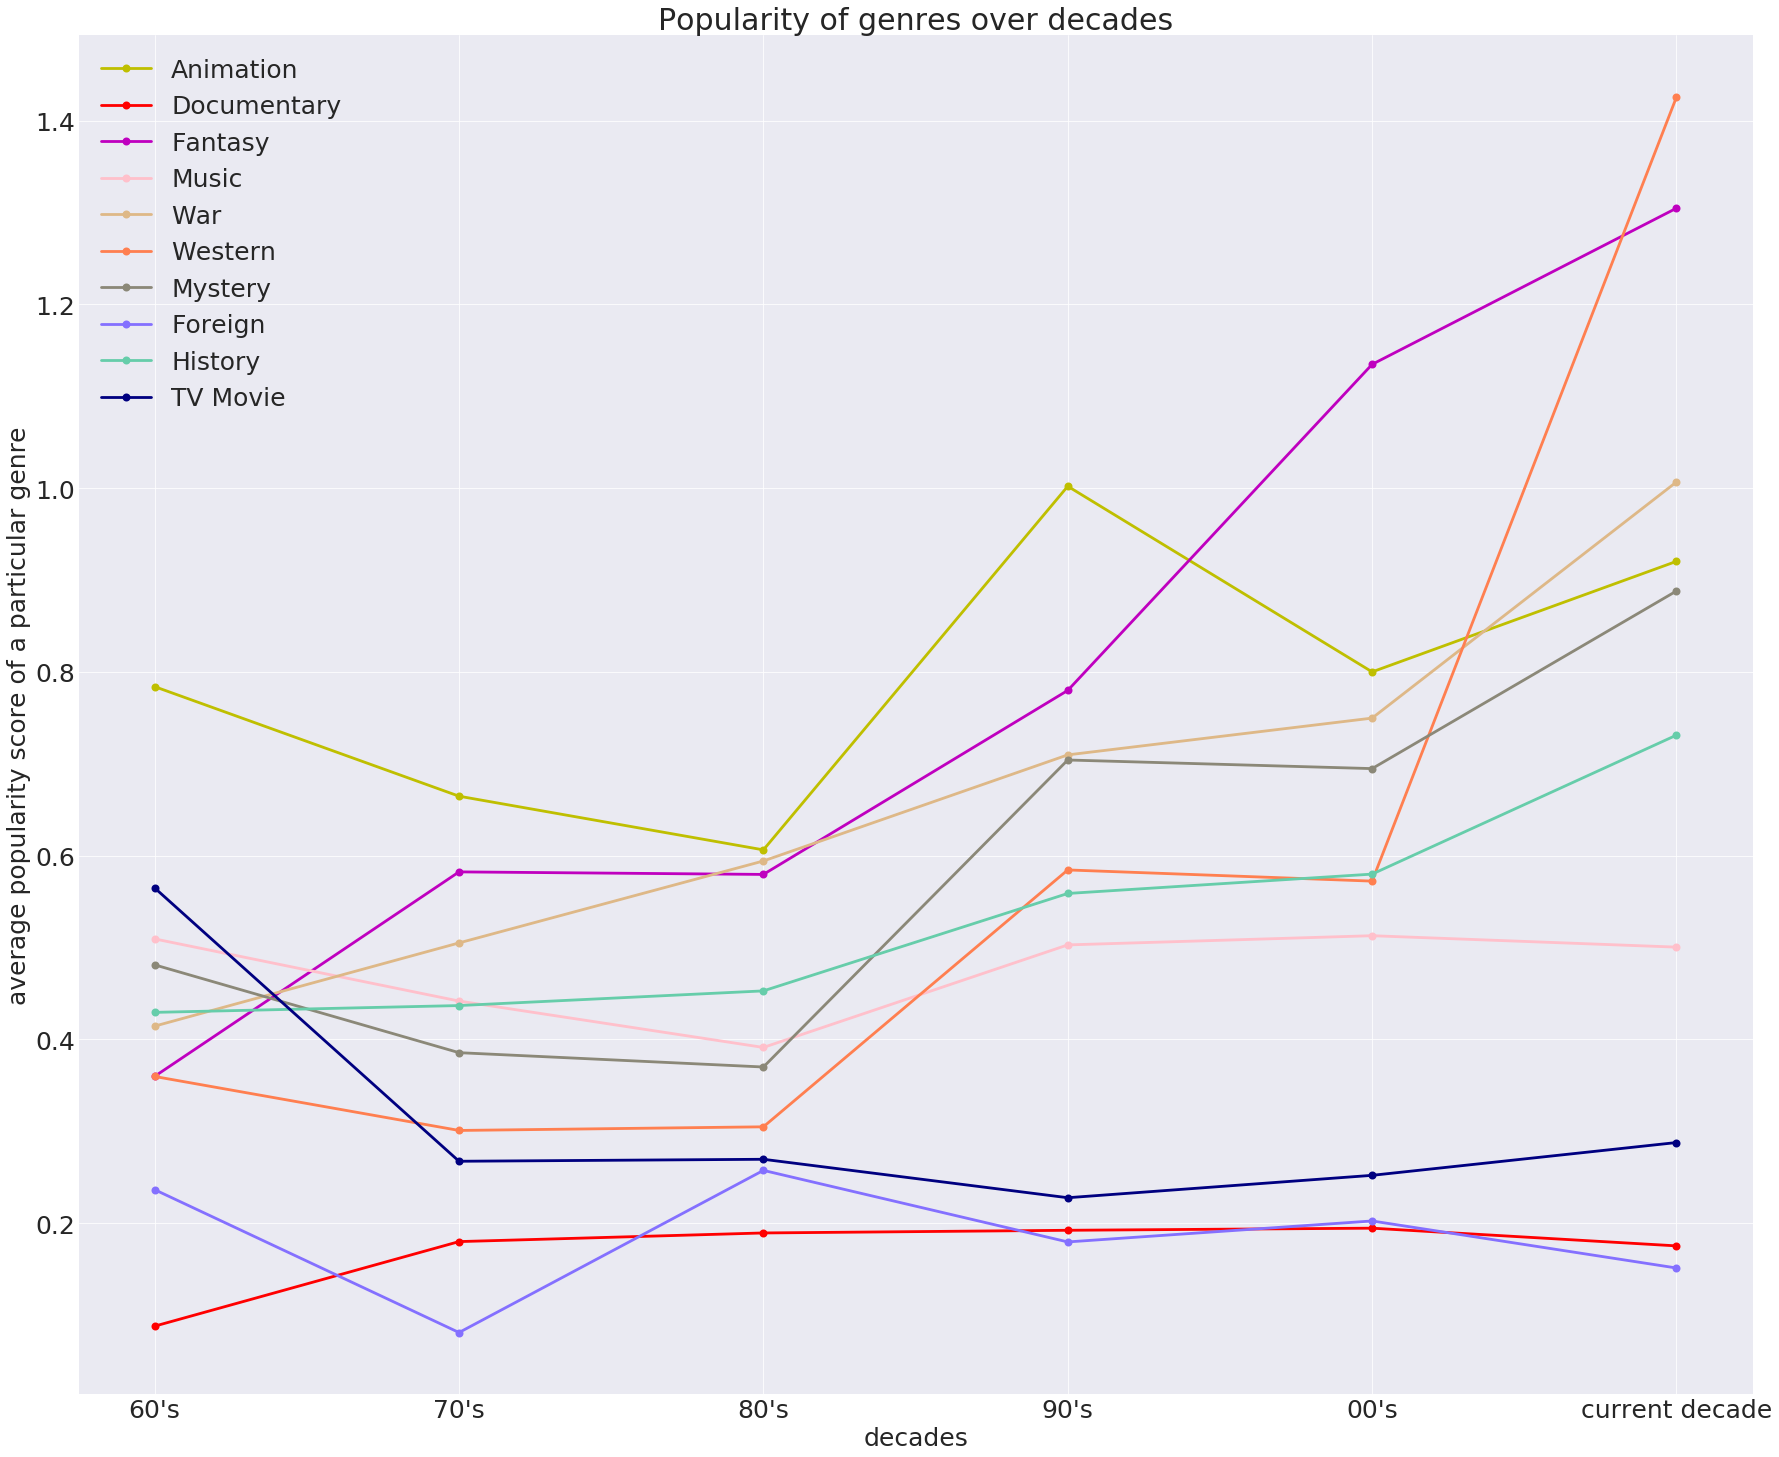

In [120]:
figsize[0] = 30
figsize[1] = 25
ind = np.arange(6)
plt.plot(ind,popularity_by_decade('Animation'),linewidth = 2.8,color = 'y',marker = 'o',markeredgewidth = 2,label = 'Animation')
plt.plot(ind,popularity_by_decade('Documentary'),linewidth = 2.8,color = 'r',marker = 'o',markeredgewidth = 2,label = 'Documentary')
plt.plot(ind,popularity_by_decade('Fantasy'),linewidth = 2.8,color = 'm',marker = 'o',markeredgewidth = 2,label = 'Fantasy')
plt.plot(ind,popularity_by_decade('Music'),linewidth = 2.8,color = 'pink',marker = 'o',markeredgewidth = 2,label = 'Music')
plt.plot(ind,popularity_by_decade('War'),linewidth = 2.8,color = 'burlywood',marker = 'o',markeredgewidth = 2,label = 'War')
plt.plot(ind,popularity_by_decade('Western'),linewidth = 2.8,color = 'coral',marker = 'o',markeredgewidth = 2,label = 'Western')
plt.plot(ind,popularity_by_decade('Mystery'),linewidth = 2.8,color = '#8b8878',marker = 'o',markeredgewidth = 2,label = 'Mystery')
plt.plot(ind,popularity_by_decade('Foreign'),linewidth = 2.8,color = '#8470ff',marker = 'o',markeredgewidth = 2,label = 'Foreign')
plt.plot(ind,popularity_by_decade('History'),linewidth = 2.8,color = '#66cdaa',marker = 'o',markeredgewidth = 2,label = 'History')
plt.plot(ind,popularity_by_decade('TV Movie'),linewidth = 2.8,color = '#000080',marker = 'o',markeredgewidth = 2,label = 'TV Movie')
plt.xlabel('decades',fontsize=25)
plt.ylabel('average popularity score of a particular genre',fontsize=25)
plt.title('Popularity of genres over decades',fontsize=30)
plt.xticks(ind,popularity_by_decade('Animation').index.categories,fontsize = 25)
plt.yticks(fontsize = 25)
plt.legend(loc = 'upper left',fontsize = 25);

__Looking at the above graph we can see that the highest average popularity score is for Animation genre till 90's, in 00's for Fantasy genre and so far in the current decade Western genre is at top. As mentioned earlier as well the genres mentioned in the above line chart are bottom ten genres based on the number of movies that have a particular genre. In the cell below cell contains the detailed numbers depicting the average popularity score for each genre in the given category.__

In [114]:
print('Animation')
print(popularity_by_decade('Animation'))
print('Documentary')
print(popularity_by_decade('Documentary'))
print('Fantasy')
print(popularity_by_decade('Fantasy'))
print('Music')
print(popularity_by_decade('Music'))
print('War')
print(popularity_by_decade('War'))
print('Western')
print(popularity_by_decade('Western'))
print('Mystery')
print(popularity_by_decade('Mystery'))
print('Foreign')
print(popularity_by_decade('Foreign'))
print('History')
print(popularity_by_decade('History'))
print('TV Movie')
print(popularity_by_decade('TV Movie'))

Animation
decade
60's              0.783928
70's              0.664687
80's              0.606249
90's              1.002040
00's              0.799988
current decade    0.920306
Name: popularity, dtype: float64
Documentary
decade
60's              0.087849
70's              0.179876
80's              0.189283
90's              0.192189
00's              0.194481
current decade    0.175212
Name: popularity, dtype: float64
Fantasy
decade
60's              0.359747
70's              0.582298
80's              0.579540
90's              0.779828
00's              1.134733
current decade    1.304709
Name: popularity, dtype: float64
Music
decade
60's              0.509348
70's              0.441695
80's              0.391210
90's              0.502819
00's              0.512826
current decade    0.500395
Name: popularity, dtype: float64
War
decade
60's              0.414410
70's              0.504992
80's              0.594167
90's              0.709656
00's              0.749688
current de

### Q6. In the last section we will see the properties associated with movies having adjust profit greater than the overall median value for the same.

__Below I have created a new column called profit_adj which holds the adjusted profit for the movies.__

In [109]:
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']


__Below I have calculated the median for the profit_adj columns and defined a new data base which only contains movies which have higher adjusted profit than the median.__

In [110]:
median = df.profit_adj.median()

df_high_profit = df.query('profit_adj > @median ')


__In the following cells I have compared various properties for the overall data base and the data base which contains movies which have adjusted profit above the overall median value. 1 denotes the values for overall data frame wheres as 2 dentoes the values for the new data frame.__

In [111]:
vote_average_1 =df.vote_average.mean()
popularity_average_1 = df.popularity.mean()
vote_count_average_1 = df.vote_count.mean()
budget_adj_average_1 = df.budget_adj.mean()
runtime_average_1 = df.runtime.mean()
series_1 = pd.Series([popularity_average_1,vote_count_average_1,budget_adj_average_1,runtime_average_1])



vote_average_2 =df_high_profit.vote_average.mean()
popularity_average_2 = df_high_profit.popularity.mean()
vote_count_average_2 = df_high_profit.vote_count.mean()
budget_adj_average_2 = df_high_profit.budget_adj.mean()
runtime_average_2 = df_high_profit.runtime.mean()
series_2 = pd.Series([popularity_average_2,vote_count_average_2,budget_adj_average_2,runtime_average_2])

series_1 < series_2


0    True
1    True
2    True
3    True
dtype: bool

__As we can see by running the output of above cell that movies which have adjusted profit above the median also have higher average popularity, vote score, number of votes, adjusted budget and infact slightly more average runtime as well.__

<a id='conclusions'></a>
## Conclusions
> Finally coming to the conclusion let's see if I have managed to find the satisfactory answers to the questions which I posed at the beginning of this analysis.

> Q1. What is average profit by genre for movies which only have a single genre?

> `The above question has been answered, detailed data is presented in the cells pertaining to this question and from the visualisations and we can also see that the genre history has the highest average profit among all`

> Q2. Trends of top ten genres present in most movies over the decades?

> `The above question has been answered and the visualisations have also been presented which clear depicts that Drama has the lead in all the decades except in 80's where it was slightly trumped by Comedy and detailed number analysis has already been provided above under the relevant section.`

> Q3. Trends of bottom ten genres present in most movies over the decades?

> `The above question has been answered and the visualisations have also been presented which clear depict that in 60's genre Western has the edge in terms of number of movies it it's is present in, 70's the lead is taken by genre Mystery, from then on till 00's genre Fantasy leads among the bottom ten and in the current decade so far genre Documentary surges and leaps ahead of all the other amongst the bottom ten, detailed number analysis has already been provided above under the relevant section.`

> Q4. What is the total number of movies pertaining to each genre?

> `As I have plotted a bar chart which clearly shows the number of movies each genre is present in and we also can cocluded from the bar chart that Drama tops the list followed by comedy and thriller occupies the third spot also the detailed numbers are provided in the relevant section above in the report`


> Q5. Which genre(s) is/are most popular over decades?

> `To address this question by plotting line charts I have made a similar distiction among the genres i.e top ten and bottom then and for the top ten the visulisations clearly depict that in every decade genre Adventure has the highest popularity over the decades among the top ten barring in 90's where Science Fiction trumps it by a slight margin, and for the bottom ten genres highest average popularity score is for Animation genre till 90's, in 00's for Fantasy genre and so far in the current decade Western genre is at top, the number data for every genre by decade again has been provided in the relevant sections above.`



> Q6. What are the properties associated with movies having high adjusted profits?

> `Movies which have adjusted profit above the median also have higher average popularity, vote score, number of votes, adjusted budget and infact slightly more average runtime as well as compared to movies which have adjusted profit below the mean.`

> CAVEATS/LIMITATIONS

> `I have explored the Tmdb data set and did some exploratory analysis but the caveat is I haven't applied any statistical tests on the given data so all the results are purely based on the exploratory observation and is safe to say that they might or might not be superficial.` 

> `Some of the issues I have while exploring the data set were missing data, duplicated data which were taken care of in the data wrangling and cleaning part but it has to be kept in mind that the null and zero values were imputed by the respective means of the numeric columns hence some of the results might not be what they would have been have I had access to real data for those missing and 0 values.` 







In [121]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0